In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

In [16]:
#loading the file 
dff=r'C:\Users\smhz_\PycharmProjects\Movies_project1\movies.csv'
df = pd.read_csv(dff)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [26]:
# check for missing data

for col in df.columns:
    per_miss=np.mean(df[col].isnull())
    print('{} - {}%'.format(col,per_miss))

name - 0.0
rating - 0.010041731872717789
genre - 0.0
year - 0.0
released - 0.0002608242044861763
score - 0.0003912363067292645
votes - 0.0003912363067292645
director - 0.0
writer - 0.0003912363067292645
star - 0.00013041210224308815
country - 0.0003912363067292645
budget - 0.2831246739697444
gross - 0.02464788732394366
company - 0.002217005738132499
runtime - 0.0005216484089723526


In [21]:
# counting total rows with missing data
df.isnull().sum().sum()

2473

In [49]:
# checking coorealtions of each colums
df.corr(method="pearson") # three types pearson, kendall, spearman
# from the matrix its clear that gross has strong positve correlation with votes and budget since the value is above 0.5

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [32]:
df['budget'].isnull().sum()

2171

In [36]:
#dropping rows with no budget 
df_bgv = df.dropna(subset=['budget', 'votes','gross'])

In [39]:
# testing if there are any nulls in 'budget, votes, gross columns'
df_bgv['votes'].isnull().sum()

0

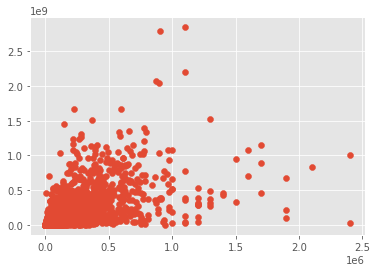

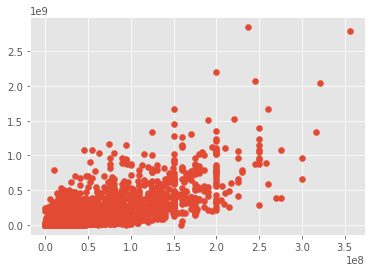

In [42]:
#scatter plot for votes vs gross and budget vs gross
plt.scatter(x=df_bgv['votes'],y=df_bgv['gross'])
plt.show()
plt.scatter(x=df_bgv['budget'],y=df_bgv['gross'])
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

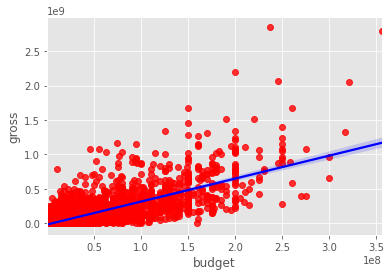

In [47]:
# plotting linear regression for budget vs gross 
sns.regplot(x='budget', y='gross', data=df_bgv, scatter_kws = {"color":"red"}, line_kws={"color":"blue"})

<AxesSubplot:xlabel='votes', ylabel='gross'>

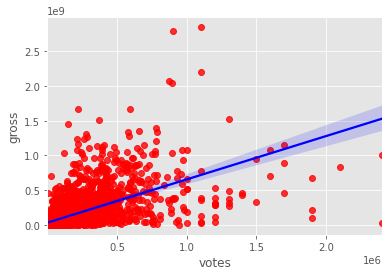

In [48]:
# plotting linear regression for votes vs gross 
sns.regplot(x='votes', y='gross', data=df_bgv, scatter_kws = {"color":"red"}, line_kws={"color":"blue"})

In [50]:
# further finding the correlation with non-numerical columns
# for this the orginal df is used  not df_bgv
# the non-numerical columns are given category codes. so same values would have same code
df_numerized = df
for col in df_numerized.columns:
    if(df_numerized[col].dtype == 'object'):
        df_numerized[col]=df_numerized[col].astype('category')
        df_numerized[col]=df_numerized[col].cat.codes
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0


<function matplotlib.pyplot.show(close=None, block=None)>

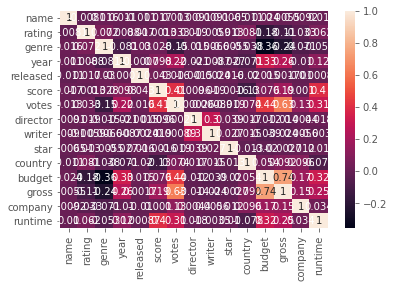

In [54]:
corr=df_numerized.corr()
sns.heatmap(corr, annot=True)
plt.show

In [60]:
# filtering out all the corrleations that are greater than 0.5
corr_mat = df_numerized.corr()
corr_pairs = corr_mat.unstack()
sorted_corr_pairs = corr_pairs.sort_values()
high_corr = sorted_corr_pairs[(sorted_corr_pairs)>0.5]
high_corr
# its clear that only votes and budget have high correlation 

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64